In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import glob
import os
import pathlib
import cv2
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [4]:
x =  np.load(r"directory\x_train.npy")
val = np.load(r"directory\y_train.npy")
x.shape
print(val)

[0 0 1 ... 1 1 1]


In [5]:
for i in x[:10]:
    print(i.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,val, test_size = 0.2)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25)

In [8]:
print("X_train:",len(X_train))
print("y_train :",len(y_train))

print("X_val:",len(X_val))
print("y_val :",len(y_val))

print("X_test:",len(X_test))
print("y_test :",len(y_test))

print()

X_train: 2133
y_train : 2133
X_val: 711
y_val : 711
X_test: 712
y_test : 712



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [10]:
efficientnet = Sequential()
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB2(
                    include_top=False,
                    weights='imagenet',
                    input_tensor=None,
                    input_shape=(150,150,3),
                    pooling=None,
                    classes=2,
                    classifier_activation='softmax',

                )

In [11]:
efficientnet.add(pretrained_model)
efficientnet.add (tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'))
efficientnet.add(tf.keras.layers.BatchNormalization())
efficientnet.add(Flatten())
efficientnet.add(Dense(64, activation='relu'))
efficientnet.add(Dense(32, activation='relu'))
efficientnet.add(Dense(16,activation='relu'))
efficientnet.add(Dense(1, activation='sigmoid'))

In [12]:
efficientnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 5, 5, 1408)        7768569   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 16)          202768    
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 16)          64        
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                25664     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [13]:
from tensorflow.keras.optimizers import Adam
efficientnet.compile(optimizer=Adam(learning_rate=0.003),loss='binary_crossentropy',metrics=['accuracy'])



In [14]:
history = efficientnet.fit(
    x = X_train, 
    y = y_train,
    validation_data=(X_val,y_val), 
    batch_size = 16,
    epochs=25)

Epoch 1/25
134/134 [==============================] - 58s 313ms/step - loss: 0.5957 - accuracy: 0.6957 - val_loss: 55.2822 - val_accuracy: 0.5316
Epoch 2/25
134/134 [==============================] - 37s 276ms/step - loss: 0.4787 - accuracy: 0.7778 - val_loss: 3.6817 - val_accuracy: 0.5598
Epoch 3/25
134/134 [==============================] - 38s 281ms/step - loss: 0.4618 - accuracy: 0.8031 - val_loss: 0.4276 - val_accuracy: 0.7848
Epoch 4/25
134/134 [==============================] - 38s 284ms/step - loss: 0.3889 - accuracy: 0.8308 - val_loss: 0.4535 - val_accuracy: 0.7947
Epoch 5/25
134/134 [==============================] - 38s 285ms/step - loss: 0.3146 - accuracy: 0.8781 - val_loss: 0.3012 - val_accuracy: 0.8692
Epoch 6/25
134/134 [==============================] - 38s 287ms/step - loss: 0.3262 - accuracy: 0.8654 - val_loss: 2.2543 - val_accuracy: 0.5387
Epoch 7/25
134/134 [==============================] - 39s 288ms/step - loss: 0.2293 - accuracy: 0.9128 - val_loss: 0.3717 - val_a

In [15]:
efficientnet.evaluate(X_test,y_test)

23/23 [==============================] - 5s 150ms/step - loss: 0.4783 - accuracy: 0.87781s - loss: 0.426 - ETA: 0s - loss: 0.4483 - accuracy - ETA: 0s - loss: 0.4834 - accuracy: 0.


[0.4782896041870117, 0.8778089880943298]

In [16]:
pred = efficientnet.predict(X_test)
y_pred = np.round(pred)
y_pred

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[321,  34],
       [ 53, 304]], dtype=int64)

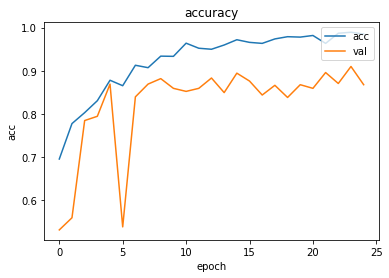

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper right')
plt.show()